In [48]:
# import necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [49]:
data = pd.read_csv(r"C:\Users\User\Desktop\Data-Analytics-for-Insurance-Cost-Data-Set\Data\raw-data\insurance.csv")

In [50]:
data.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [51]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
data.columns = headers

In [52]:
data.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


## Exploratory data analysis

In [53]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [54]:
data.replace("?", np.nan, inplace = True)

In [55]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = data['smoker'].value_counts().idxmax()
data["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = data['age'].astype('float').mean(axis=0)
data["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
data[["age","smoker"]] = data[["age","smoker"]].astype("int")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


In [56]:
data['charges'].describe()

count     2771.000000
mean     13260.062289
std      12153.767132
min       1121.873900
25%       4687.797000
50%       9304.701900
75%      16516.743675
max      63770.428010
Name: charges, dtype: float64

In [57]:
data[["charges"]]= np.round (data[["charges"]], 2)
print(data.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   18       2  33.770               1       0       4   1725.55
1   28       2  33.000               3       0       4   4449.46
2   33       2  22.705               0       0       1  21984.47
3   32       2  28.880               0       0       1   3866.86
4   31       1  25.740               0       0       4   3756.62


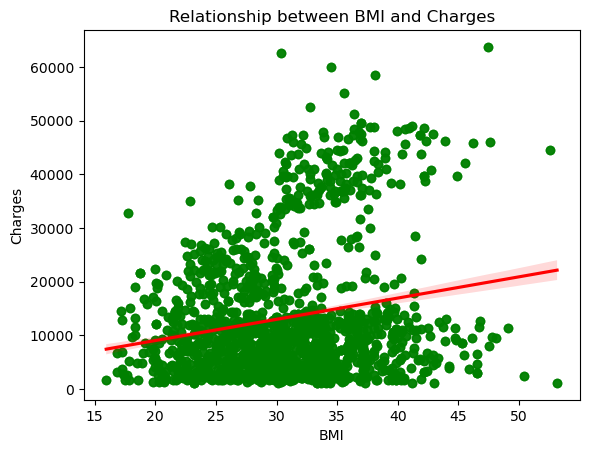

In [58]:
sns.regplot(x= "bmi", y="charges", data=data, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

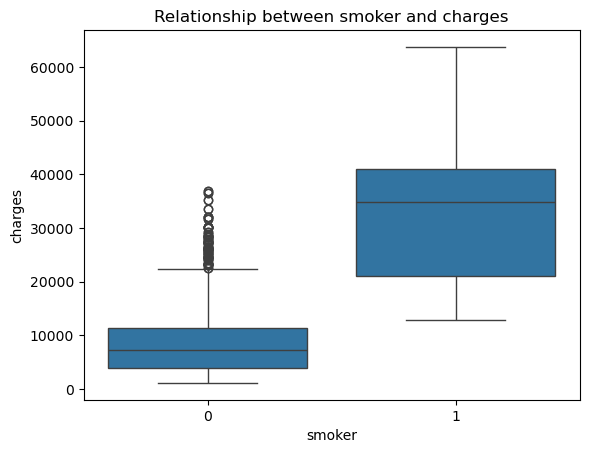

In [59]:
sns.boxplot(x = "smoker" , y="charges", data=data)
plt.title("Relationship between smoker and charges")
plt.xlabel("smoker")
plt.ylabel("charges")
plt.show()

In [60]:
data.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


## model development


In [61]:
x = data[["smoker"]]
y = data["charges"]

lm = LinearRegression()

lm.fit(x, y)

print(lm.score(x,y))

0.6227430402464125


In [62]:
print("intercept", lm.intercept_)

intercept 8417.874393115926


In [63]:
z = data[["age", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(z, y)
print(lm.score(z,y))

0.7505828643461756


In [64]:
# creating a pipelinr for training the model
# Define the pipeline
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("polynomial", PolynomialFeatures(include_bias=False)),
    ("model", LinearRegression())
])

# Ensure input features are float
z = z.astype(float)

# Fit the pipeline
pipeline.fit(z, y)

# Predict and evaluate
y_pred = pipeline.predict(z)
print("R2 score:", r2_score(y, y_pred))

R2 score: 0.8447375144404587


## MODEL REFINEMENT

In [65]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42)

In [66]:
# initialize a ridge regression model
ridge_model = Ridge(alpha=1.0)
#fit the model
ridge_model.fit(x_train, y_train)
# predict on the test set
y_pred_ridge = ridge_model.predict(x_test)
# evaluate the model
print("Ridge Regression R2 score:", r2_score(y_test, y_pred_ridge))

Ridge Regression R2 score: 0.7771627806473181


In [67]:
# apply polynomial transformation to the taining paremeters with degree2 
poly = PolynomialFeatures(degree=2)
# transform the training data
x_train_poly = poly.fit_transform(x_train)
# fit the model with polynomial features
ridge_model.fit(x_train_poly, y_train)
# predict on the test set with polynomial featues
print("Ridge Regression with polynomial features R2 score", r2_score(y_test, ridge_model.predict(poly.transform(x_test))))

Ridge Regression with polynomial features R2 score 0.8481955063254885


In [ ]:
data.to_csv("insurance.csv", index=False)
